# Comparison between different analysis runs

This notebook compares the results from different photometric datasets and different assumptions about the stellar limb darkening.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import seaborn as sb
from collections import OrderedDict

In [5]:
%run src/core.py

In [6]:
%run plotting.py

In [112]:
d = OrderedDict()
d['tess'] = read_tess_mcmc('results/toi_263_tess_sap.nc')
d['tess_ldtk'] = read_mcmc('results/toi_263_tess_sap_ldtk.nc')
d['lco'] = read_mcmc('results/toi_263_lco.nc')
d['lco_ldtk'] = read_mcmc('results/toi_263_lco_ldtk.nc')
d['m2'] = read_mcmc('results/toi_263_m2.nc')
d['m2_ldtk'] = read_mcmc('results/toi_263_m2_ldtk.nc')
d['ml'] = read_mcmc('results/toi_263_m2_lco_joint.nc')
d['mlt'] = read_mcmc('results/toi_263_tess_m2_lco.nc')
d['mlt_ldtk'] = read_mcmc('results/toi_263_tess_m2_lco_ldtk.nc')

for k in d:
    d[k] = derive_qois(d[k])

In [113]:
def plot_dhist(d1, d2, parameter, x, range, ax, bins=20, width=0.8, offset=0.01):
    v1, e = histogram(d1[parameter], range=range, density=True, bins=bins)
    v2, e = histogram(d2[parameter], range=range, density=True, bins=bins)

    vmax = max(v1.max(),v2.max())
    v1 = v1/ vmax * 0.8 * 0.5
    v2 = v2/ vmax * 0.8 * 0.5

    ax.fill_betweenx(e, x-offset, x-offset-r_[v1,v1[-1]], step='post', edgecolor='k')
    ax.fill_betweenx(e, x+offset, x+offset+r_[v2,v2[-1]], step='post', edgecolor='k')

In [114]:
def plot_parameter(parameter, range, bins=20, ylabel=''):
    fig, ax = subplots(figsize=(13,5))
    plot_dhist(d['tess'], d['tess_ldtk'], parameter, 0, range, ax, bins=bins)
    plot_dhist(d['lco'],  d['lco_ldtk'], parameter, 1, range, ax, bins=bins)
    plot_dhist(d['m2'],   d['m2_ldtk'], parameter, 2, range, ax, bins=bins)
    plot_dhist(d['mlt'],  d['mlt_ldtk'], parameter, 3, range, ax, bins=bins)
    setp(ax, ylabel=ylabel, ylim=range)
    sb.despine(fig, offset=10)
    return fig

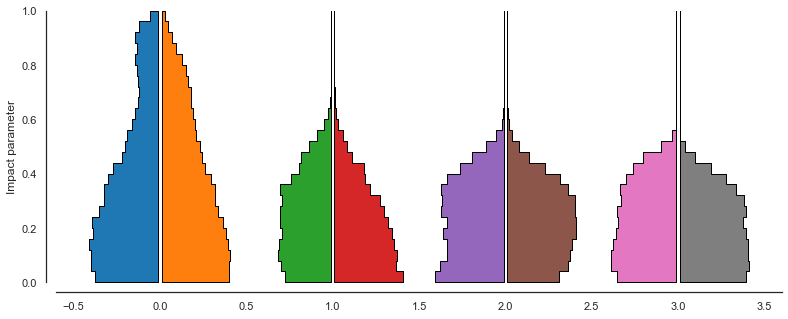

In [115]:
plot_parameter('b', (0,1), 25, 'Impact parameter');

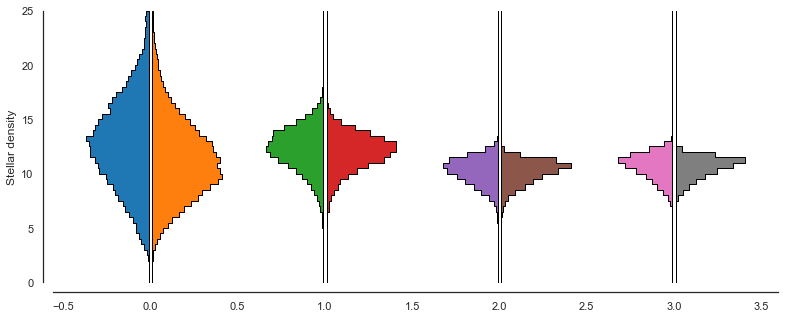

In [116]:
plot_parameter('rho', (0,25), 50, 'Stellar density');

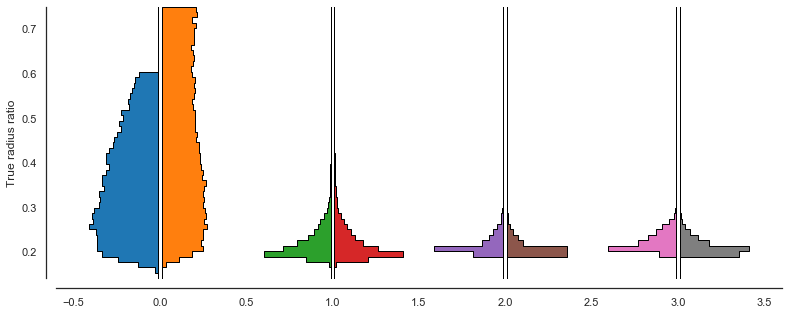

In [117]:
plot_parameter('k_true', (0.14, 0.75), 50, 'True radius ratio');

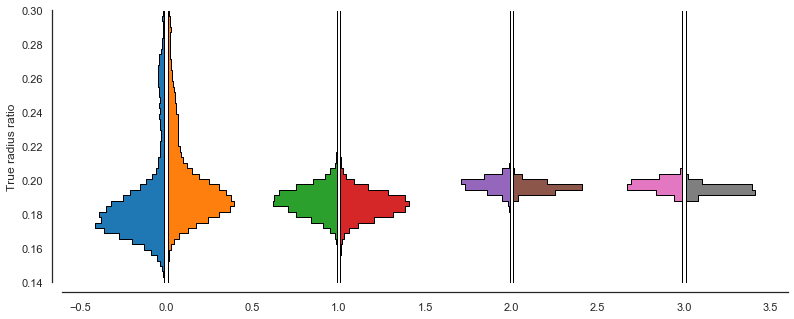

In [110]:
plot_parameter('k_app', (0.14, 0.3), 50, 'True radius ratio');

In [9]:
def bplot2(d, p, ylabel=''):
    fig, ax = subplots(constrained_layout=True)
    
    names = d.keys()
    
    if isinstance(p, str):
        data = [df[p] for df in d.values()]
    elif callable(p):
        data = [p(df) for df in d.values()]
    else:
        raise ValueError
    
    for x, dt in enumerate(data):
        bwidth=0.8
        p = percentile(dt, [50, 16, 84, 0.5, 99.5], 0)
        ax.bar(x, p[4]-p[3], bwidth, p[3], alpha=0.25, fc='b')
        ax.bar(x, p[2]-p[1], 0.8*bwidth, p[1], alpha=0.25, fc='b')
        ax.plot((x-0.4*bwidth, x+0.4*bwidth), p[[0,0]], 'k')
    [axhline(v, c='k', ls='--', lw=1, alpha=0.5) for v in p[1:3]]
        
    setp(ax, xticks=arange(len(d)), xticklabels=d.keys(), ylabel=ylabel)
    sb.despine(fig, offset=10)

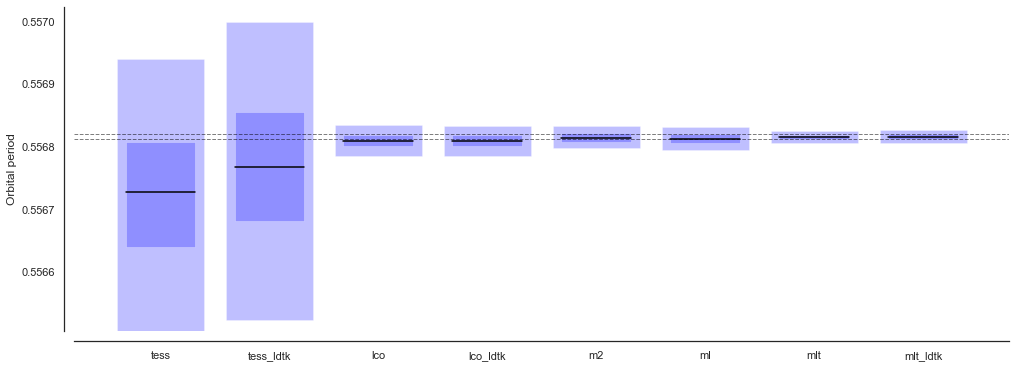

In [10]:
bplot2(d, 'period', 'Orbital period')

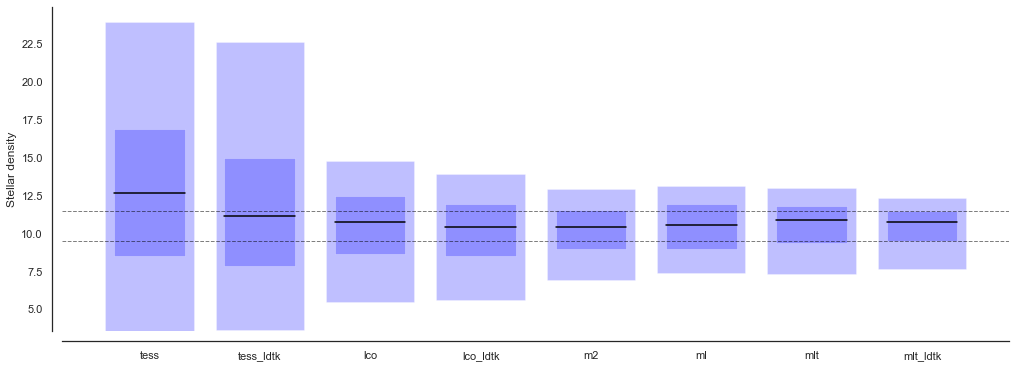

In [126]:
bplot2(d, 'rho', 'Stellar density')

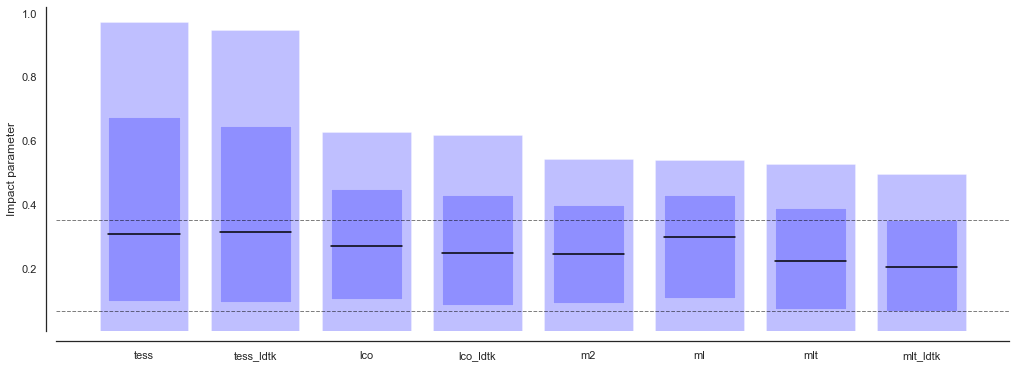

In [103]:
bplot2(d, 'b', 'Impact parameter')

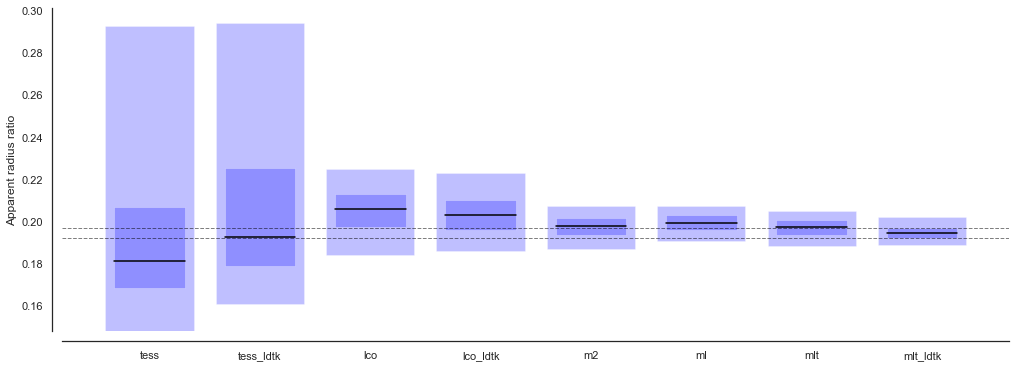

In [104]:
bplot2(d, lambda df: sqrt(df.k2_app), 'Apparent radius ratio')

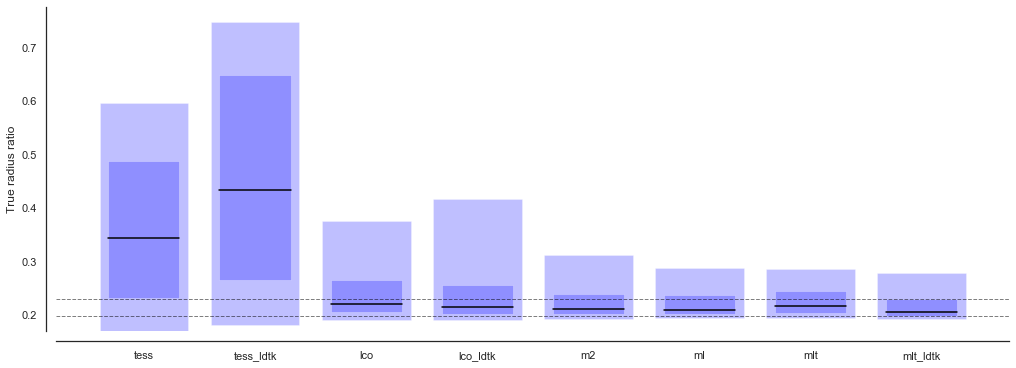

In [105]:
bplot2(d, lambda df: sqrt(df.k2_true), 'True radius ratio')

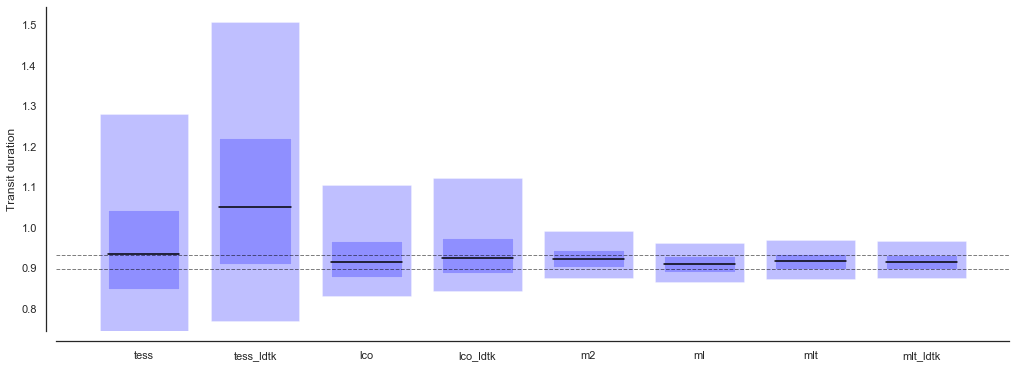

In [127]:
bplot2(d, 't14_h', 'Transit duration')

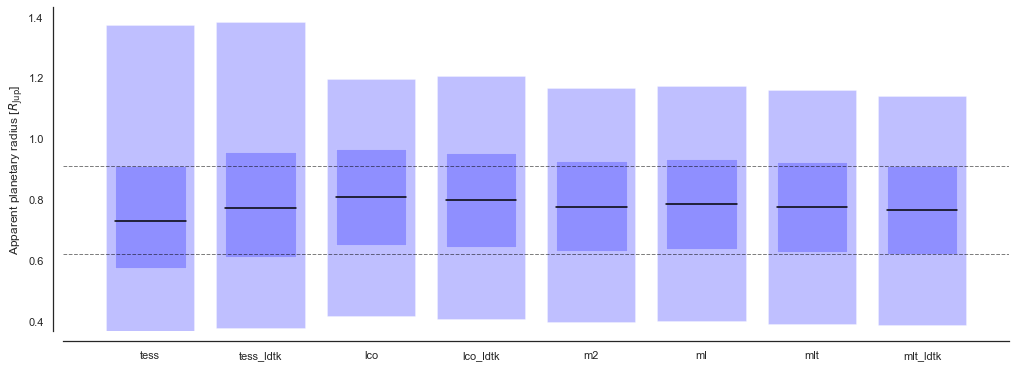

In [132]:
bplot2(d, 'r_app', 'Apparent planetary radius [$R_\mathrm{Jup}$]')

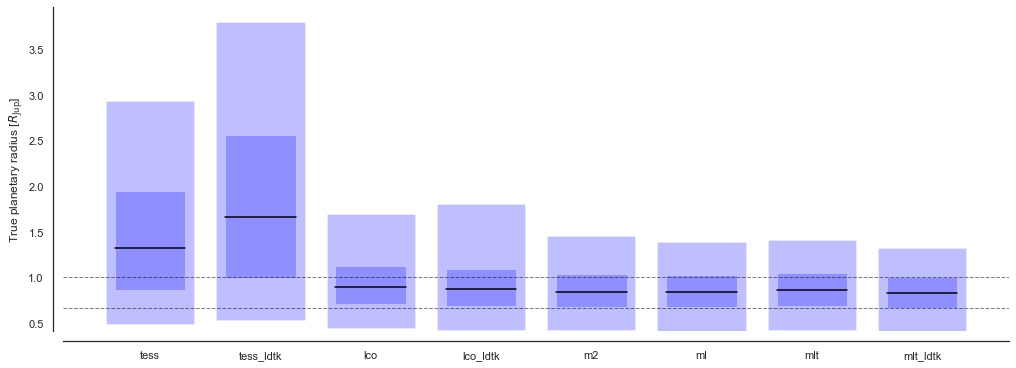

In [131]:
bplot2(d, 'r_true', 'True planetary radius [$R_\mathrm{Jup}$]')

---


<center> © 2019 Hannu Parviainen </center>